# Milestone 4 - Independent Project

## Author -



## Instructions

1. Generate a clear statement problem and provide the location for the datasetyou use.
2. Provide a clear solution to the problem for a non-technical audience.
3. Visually explore the data to generate insight and include summary statistics.
4. Use an appropriate statistical analysis method.
5. Prepare the data via cleaning, normalization, encoding, et cetera.
6. Generate and evaluate a working model (hypothesis, linear, or time series).
7. Draw direct inferences and conclusions from model results.
8. Use professional coding standards and techniques including:

    - explanatory markdown text
    - proper code comments
    - functions to minimize redundant code
    - minimize hard-coded variables

### Note
Please use the <a class="icon-pdf" title="Independent Project Rubric" href="https://library.startlearninglabs.uw.edu/DATASCI410/Handouts/DATASCI%20410%20Independent%20Project%20Rubric.pdf" target="_blank" rel="noopener">Rubric</a> as a general guide for your project.

# Abstract
## Problem
How different features of houses affect the house price in King county? Can we use regression model to predict houses price with high accuracy?

## Conclusion
With the given dataset, features are pre-selected (not related, repeated features are dropped), normalized and encoded. By using SVR model, we can have a high performance model with r2 score to be around 0.8, suggesting that we can predict house pricing using given features with good accuracy. The SVR model uses radial basis function kernel, and with the poor performance of linear regression, we'd say that the price is non-linearly dependent on given features. 

In [2]:
# Location of dataset
# I download the the dataset from web page, it's located in my local environment 
#it also can be found :https://www.kaggle.com/harlfoxem/housesalesprediction

In [3]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import numpy.random as nr
import scipy.stats as ss
%matplotlib inline

In [4]:
#reading file using pandas
df = pd.read_csv('kc_house_data.csv')
#set to display 2 decimal place
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
#show the first five rows data
df.iloc[::,:10].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0


View the first 10 columns of the dataset to get a sense of what data look like.

In [6]:
df.describe().iloc[:,:10]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00


See the general statistics of dthe dataset for the first 10 columns.

id column is not a feature, which chould remove. 

In [7]:
df.describe().iloc[:,10:]

,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


See the general statistics of dthe dataset for the last 10 columns

In this dataset, the target variable is price, the rest are features that could contribute to the price. 

Notice that ome features are similar, so removing repeated features are necessary.

First, id and date are not a feature that contributes to house price, so ID should be removed. 

sqft_living and sqft_living15 are similar, so we keep one of them is good enough. Similar to sqft_lot and sqft_lot15.

lat and long are also related to zipcode, keep zipcode should be good enough.


Let's first visually explore the data.

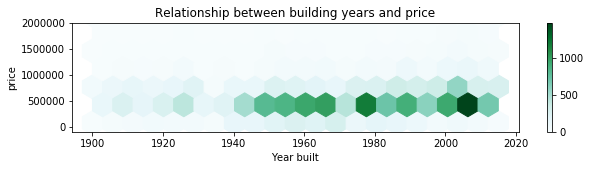

In [8]:
ax = plt.figure(figsize=(10, 2)).gca()
df.plot.hexbin(x = 'yr_built', y = 'price', gridsize = 20,ax=ax)
ax.set_xlabel('Year built')
ax.set_ylim(-100000,2000000)
ax.set_title('Relationship between building years and price');


In hexbin plot, we can learn that:

Houses around and below 50,000 dollars are polpular in the market.
Newer houses are generally more popular in the market. (House built after 1940s)

We also need to take house remodeling into account.It would be interesting to know whether renovation would help increase the pricing of the house.

C:\Users\zhuoy\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\zhuoy\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


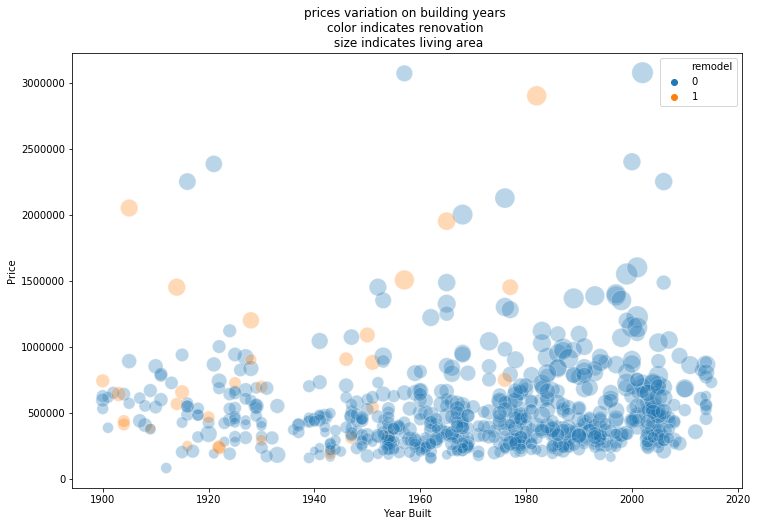

In [9]:
#group year built, year_remodel, and price via averaged values.
remodels = df[['yr_built', 'yr_renovated','price','sqft_living15']]
#use count to indicate whether the house have been renovated, 1 stands for yes, 0 means no.
remodels.loc[:,'remodel'] = np.where(remodels['yr_renovated'] != 0, 1, 0)

ax = plt.figure(figsize=(12, 8)).gca()
#only plotting the first 700 observations to avoid overplotting
sns.scatterplot(remodels['yr_built'][:700], remodels['price'][:700], hue=remodels['remodel'][:700],
                alpha =0.3, s=remodels['sqft_living15']/10)
ax.set_xlabel('Year Built')
ax.set_ylabel('Price')
ax.set_title('prices variation on building years \n' +
            'color indicates renovation \n ' +
            'size indicates living area');

In this remodeling scatter plot, we can learn that:

1. It's hard to tell whether remodeling has impact on house pricing because there are other factors contribute to it.
2. Remodeling occures more commonly in old houses (built before 1960s)

This reminds me that renovation might not a major contributor to price, which could be removed for later model training.

Next step, I group year_built, we can see how price changes along with time, with the changes of living area.Prices and living areas are averaged.Also, I want to consider briefly location effect, so zipcodes are averaged.

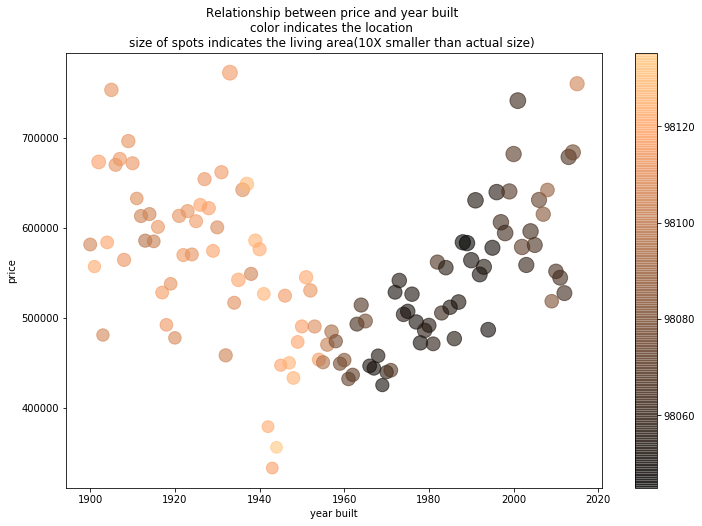

In [10]:
fig = plt.figure(figsize=(12,8))
year_zip = df[['price','zipcode','yr_built','sqft_living15']].groupby(['yr_built']).agg(np.mean)
f1=plt.scatter(year_zip.index, year_zip['price'], c=year_zip['zipcode'], 
               s = year_zip['sqft_living15']/10, cmap='copper', alpha=0.6)
plt.colorbar(f1)
plt.xlabel('year built')
plt.ylabel('price')
plt.title('Relationship between price and year built \n' +
         'color indicates the location \n'+
         'size of spots indicates the living area(10X smaller than actual size) ');

In this scatter plot, we can see that:
1. It's quite surprising that price is not monotonically increased along with time. Due to currency inflation, I thought that price would be increased for the same house along with time. It turns out many factors could have impact on house pricing.

2. By introducing the location of a hourse to the figure, we found that houses that are built after 1960s are in regions 98100 and before. In this region, the newer the house is, the higher price it is. In the region of 98100 and beyond, houses are much older, but still yield high prices, suggesting that these areas have some other external factors that affect the price, like school district, or shopping center. 

3. Size of the spots are living areas of houses. It's hard to tell the difference in this figure though. (see next plot)

Next, I want to see how exact location affects house pricing, combined the effect of living area. I group the data using zipcode, and average out price and living area.

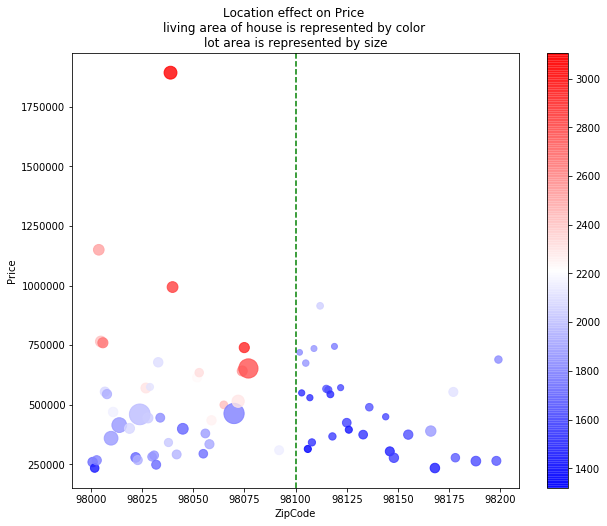

In [11]:
zipcode_group = df[['zipcode', 'price', 'sqft_living15', 
                    'sqft_lot15', 'condition']].groupby('zipcode').agg(np.median)

fig = plt.figure(figsize=(10,8))
im3=plt.scatter(zipcode_group.index, zipcode_group['price'], c =zipcode_group['sqft_living15'], 
                    s = zipcode_group['sqft_lot15']/100 ,alpha=0.8, cmap='bwr')
plt.axvline(np.mean(zipcode_group.index)+ 23, color='green', linestyle ='--')
plt.colorbar(im3)
plt.xlabel('ZipCode')
plt.ylabel('Price')
plt.title('Location effect on Price \n' +
         'living area of house is represented by color \n' + 
         'lot area is represented by size');

Combined two scatter plots, we can learn that:
1. From scatter plot "Relationship between price and year built", we've learned that houses that built before 98100 regions are built after 1960s (approximately), and are more expensive. Combined with this scatter plot 'Location effect on Price', the first half of x-axis are new houses (after 1960s), the second half would be old houses. In this case, we can confirm that houses are built larger along with time (Spots are larger in the first half).

2. Combined theses two scatter plots, we can see that lands are more valuable in the zipcode 98100 and beyond. (Smaller and older houses, but they still yield similar prices compared to larger and newer and hourses) 

3. In general, in nearby neighborhood, larger houses (larger living areas) are more expensive (more reds and light blues in higher y-axis) 

4. Lot size is not linearly related to living size.

Another important factor contribute to house pricing is surrounding environment.

Below, I plot the prices vs waterfront features and condictions of the house.

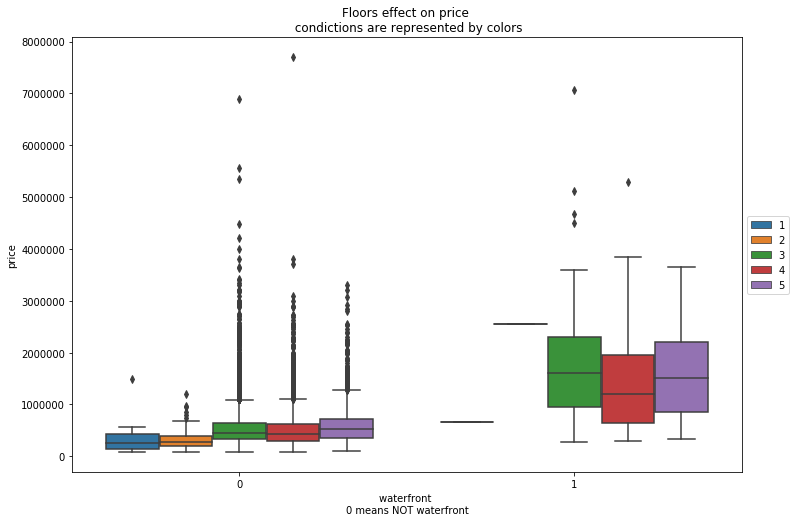

In [12]:
fig = plt.figure(figsize=(12,8))
im2 = sns.boxplot(df['waterfront'], df['price'], hue=df['condition'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('waterfront \n' +
           '0 means NOT waterfront')
plt.title('Floors effect on price \n '+
         'condictions are represented by colors');

In this box plot, we can see that:

1. When comparing non-waterfront and waterfront hourses at the same house condition (color),there's a significant difference on price. Waterfront house are more expensive than not-waterfront house. 
2. Within the non-waterfront observations, houses with better conditions yield higher prices. 
3. In the waterfront observations, there is only a few bad condition houses. Most of them are in a good condition. However, the price is not greatly impacted by condition.

##### Summary on how features affect house pricing:

1. Waterfront price is more expensive than non-waterfront house.
2. For houses whose zipcode beyond 98100 are smaller and older, but the price is relatively the same to those houses that were built in recent decades with larger living areas. Both location and living areas have major contributions to house pricing.
3. In the same (or nearby) neighborhood, larger living areas results in higher price.

#### Use  statistical  analysis method to test significance of different categories


First, study the distribution of some features.

Price is our target varible, so study price first.

In [13]:
df['price'].isnull().sum()

0

There is no missing values in price. We can contiune our analysis 

In [14]:
#create log price
df['log price'] = np.log(df['price'])

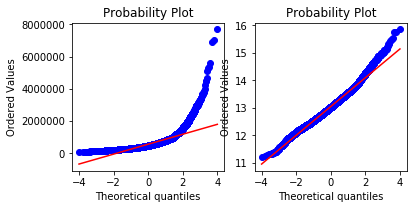

In [15]:
def qq_plot(vec1, vec2):
    import scipy.stats as ss
    plt.figure(figsize=(6, 6)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
    
qq_plot(df['price'],df['log price'])

Q-Q plots for price(left) and log price(right) are shown above. By eyes, log price is more straight than price, suggesting that log price could be more approaching normal than price.

We need to do a further test to evaluate that. K-S test could be used.And we need to standardized samples before applying the K-S test.

In [16]:
#standardize both price and log price
n_p = scale(df['price'])
n_lp = scale(df['log price'])

In [17]:
def ks_test(dat, name, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic for '+ name + ' = ' + str(ks_statisic))
    print('P-value for ' + name + '= ' + str(pvalue))
    
ks_test(n_p, 'price')    
ks_test(n_lp, 'log price')  

KS-statistic for price = 0.1457271152901709
P-value for price= 0.0
KS-statistic for log price = 0.025988070503970062
P-value for log price= 4.1903563850987136e-13


The null hypothesis for K-S test is two distributions have no differece.With p-value greater than threshold (0.05) suggesting that we cannot reject hypothesis, so there is no difference between two samples.

Based on the statitics, both p-values smaller than the classic 0.05 threshold, suggesting we can reject the null hypothesis in both cases.

Notice that p-value for price is very small, resulting in zero p-value. In this case, we would say log-price has a higher p-value.

If we set threshold alpha smaller, in this case, we cannot reject the hypothesis for log price, suggesting that log price has no difference to normal distribution. 
###### Thus, log price can be better represented as a normal distribution.

We're also interested in other features, such as living areas. From our graphically analysis, it's likely that larger living areas usually yields higher prices.

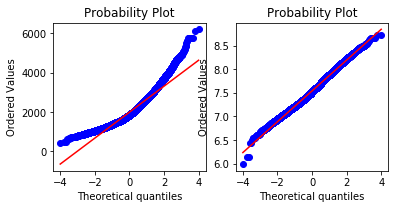

In [18]:
df['log sqft_living15'] = np.log(df['sqft_living15'])
qq_plot(df['sqft_living15'],df['log sqft_living15'])

Q-Q plots for living area(left) and log living(right) are shown above. By eyes, log living area is more straight than living, suggesting that log living area could be more approaching normal than living area.

We need to do a further test to evaluate that. K-S test could be used.And we need to standardized samples before applying the K-S test.

In [19]:
#standardize both price and log price
n_living = scale(df['sqft_living15'])
n_logliving = scale(df['log sqft_living15'])
ks_test(n_living, 'sqft_living15')
print('\n')
ks_test(n_logliving, 'log sqft_living15')

KS-statistic for sqft_living15 = 0.08899657693186064
P-value for sqft_living15= 4.102175311946372e-149


KS-statistic for log sqft_living15 = 0.03434275347812166
P-value for log sqft_living15= 1.445140332506786e-22


Based on the statitics, both p-values smaller than the classic 0.05 threshold, suggesting we can reject the null hypothesis in both cases.
log sqft_living15 has a greater p-value, meanging that we set a smaller alpha value, log living area cannot reject the null hypothesis, suggesting that log living area would be better represented by normal distribution.


Let's eplore lot areas as well.

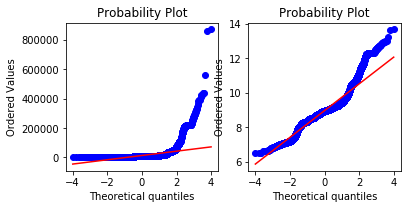

In [20]:
df['log sqft_lot15'] = np.log(df['sqft_lot15'])
qq_plot(df['sqft_lot15'],df['log sqft_lot15'])

Q-Q plots for lot area(left) and log lot (right) are shown above. By eyes, log lot area is more straight than lot area, suggesting that log lot area could be more approaching normal than living area.

We need to do a further test to evaluate that. K-S test could be used.And we need to standardized samples before applying the K-S test.

In [21]:
#standardize both price and log price
n_lot= scale(df['sqft_lot15'])
n_loglot = scale(df['log sqft_lot15'])
ks_test(n_lot, 'sqft_lot15')
print('\n')
ks_test(n_loglot, 'log sqft_lot15')

KS-statistic for sqft_lot15 = 0.34730875317878596
P-value for sqft_lot15= 0.0


KS-statistic for log sqft_lot15 = 0.134221083567987
P-value for log sqft_lot15= 0.0


Interestingly, both p-value are very small. But ks-value is higher for lot area, implying a better fit to normal distritbuion. In this case, lot area is better represented by normal distribution.

#### Next, we can study categorical variables using pair and multipopulation comparisons.
For below analysis, I use classical method to test significance of price by bedrooms, water front, condition, and floors. 

This would be a good analysis to see whether a feature contributes to price.

In [22]:
#check whether the category is pair comparison or multipopulation comparison.
print('Bedrooms: ', df['bedrooms'].unique())
print('waterfront: ', df['waterfront'].unique())
print('condition: ', df['condition'].unique())
print('Floors: ', df['floors'].unique())

Bedrooms:  [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
waterfront:  [0 1]
condition:  [3 5 4 1 2]
Floors:  [1.  2.  1.5 3.  2.5 3.5]


#### Waterfront is good for pair comparion. 

In [23]:
w0 =pd.DataFrame()
w1 = pd.DataFrame()
# fuel[['fuel', 'price']] = df[['fuel-type','price']]
print ( 'total w0 smaples:' ,sum(df['waterfront'] == 0))
print('total samples:' ,df.shape[0])

total w0 smaples: 21450
total samples: 21613


It's surprising that it's a heavily unbalanced sample. T-test is required to have balanced sample. So I am going to use bernoulli sampling to make a balanaced sample set.

And from previous analysis, log price is better represented as normal distritution. So log price is used for the rest of analysis.

In [24]:
# put samples into correponding dataframe
w0['price']=df[df['waterfront'] == 0]['log price']
w1['price']=df[df['waterfront'] == 1]['log price']


#  Bernoulli sampling
p = 0.1
w0_sample = w0.iloc[nr.choice(range(w0.shape[0]), size = int(p * w1.shape[0]*10)), :]

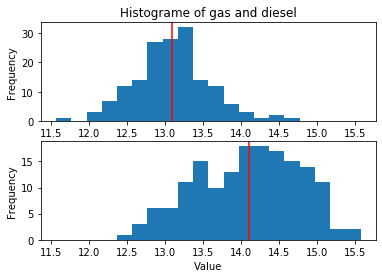

In [25]:
def hist_plot(vec, bins):
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
def plot_pop(a, b, cols=['gas', 'diesel'], nbins = 20):
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_plot(a, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

plot_pop(w0_sample['price'], w1['price'])    

These two histograms show bell shape distributions with differetn means. The general distribution shape is quite similar, however, waterfront price has a wider spread. To find the actual difference between these two distributions need t-test.

In [26]:
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b, equal_var=False)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, 
                                  alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 
             'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1],
                      confint[0], confint[1]], index = index)   
   

waterfront = t_test(w0_sample['price'], w1['price'], 0.05)
waterfront

DegFreedom   294.82
Difference    -1.01
Statistic    -15.23
PValue         0.00
Low95CI       -1.14
High95CI      -0.88
dtype: float64

From stats: p-value is very small, zero, suggesting that we can reject the null hypothesis, price for house has waterfront is different than has no waterfront. So waterfront should be a feature when trainning the model. 

#### Next, study the comparisons for bedrooms

In [27]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

There are many variables in bedrooms, we can select a few of them to do comparisons, 1, 3, 5, and 7 bedrooms would be good enough for analysis.

In [28]:
#creating dataframe for each categories
oneb = pd.DataFrame()
threeb = pd.DataFrame()
fiveb = pd.DataFrame()
sevenb = pd.DataFrame()

oneb ['price'] = df[df['bedrooms'] == 1]['log price']
threeb ['price'] = df[df['bedrooms'] == 3]['log price']
fiveb ['price'] = df[df['bedrooms'] == 5]['log price']
sevenb ['price'] = df[df['bedrooms'] == 7]['log price']

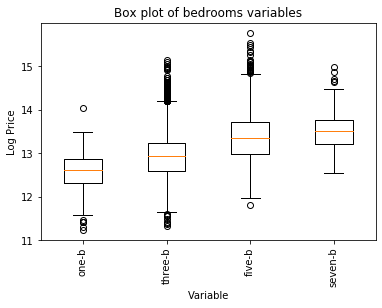

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([oneb['price'], threeb['price'], fiveb['price'], sevenb['price']])
plt.ylabel('Log Price')
ax.set_xticklabels(['one-b', 'three-b','five-b','seven-b'], rotation = 'vertical')
plt.xlabel('Variable')
plt.title('Box plot of bedrooms variables');

The plot shows variation between the distributions of the four variables. They are closed to each other, while we can see that seven badrooms are appparently more expensive than one bedromms house. 
Nest, we need to compute F-statistic and a p-value using `f_oneway` function

In [30]:
f_statistic, p_value = ss.f_oneway(oneb['price'], threeb['price'], fiveb['price'], sevenb['price'])
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 472.082445863569
P-value = 1.6278555902726796e-289


The F statistic is fairly large and the p-value is small. We can reject the null hypothesis that the 4 variables have the same mean, as the probability of the differences arising from random chance is quite low.

From the above ANOVA results we know that there is some difference in the means of these variables. However, the ANOVA does not tell us which variable is significantly different. So we need to perform HSD test.

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df2 = pd.DataFrame({'vals' :oneb['price'].tolist() + 
                    threeb['price'].tolist() +
                   fiveb['price'].tolist() + sevenb['price'].tolist(),
                   'group_num': ['oneb'] * len(oneb) + ['threeb'] * len(threeb) + 
                    ['fiveb'] * len(fiveb) +
                   ['sevenb'] * len(sevenb)  })
Tukey_HSD = pairwise_tukeyhsd(df2.vals, df2.group_num)
print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 fiveb   oneb  -0.8258 0.001 -0.9191 -0.7324   True
 fiveb sevenb    0.158 0.191 -0.0458  0.3619  False
 fiveb threeb  -0.4526 0.001  -0.486 -0.4191   True
  oneb sevenb   0.9838 0.001   0.764  1.2037   True
  oneb threeb   0.3732 0.001  0.2843  0.4621   True
sevenb threeb  -0.6106 0.001 -0.8125 -0.4087   True
---------------------------------------------------


From the table, we can see whether there is significant difference based on p-values and the reject column. Most of them have difference between pairs (label as 'True'). So bedrooms also plays a role in house pricing. 

#### Next, study condition

In [32]:
df['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

Again, we can choose three to do comparions, 1, 3, and 5

In [33]:
#create dataframes for each category
onec = pd.DataFrame()
threec = pd.DataFrame()
fivec = pd.DataFrame()


onec ['price'] = df[df['condition'] == 1]['log price']
threec ['price'] = df[df['condition'] == 3]['log price']
fivec ['price'] = df[df['condition'] == 5]['log price']

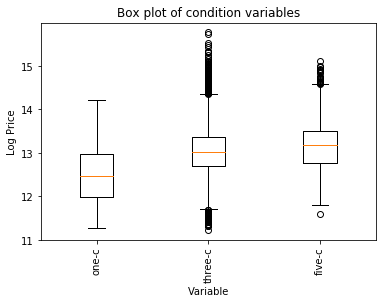

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([onec['price'], threec['price'], fivec['price']])
plt.ylabel('Log Price')
ax.set_xticklabels(['one-c', 'three-c','five-c'], rotation = 'vertical')
plt.xlabel('Variable')
plt.title('Box plot of condition variables');

The plot shows variation between the distributions of the four variables.  Outliners exist, especially in condition of three houses. Next, we need to compute F-statistic and a p-value using `f_oneway` function

In [35]:
f_statistic, p_value = ss.f_oneway(onec['price'], threec['price'], fivec['price'])
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 47.135207923172075
P-value = 3.894248919200621e-21


The F statistic is fairly large and the p-value is small. We can reject the null hypothesis that the 4 variables have the same mean, as the probability of the differences arising from random chance is quite low.

From the above ANOVA results we know that there is some difference in the means of these variables. However, the ANOVA does not tell us which variable is significantly different. So we need to perform HSD test.

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df2 = pd.DataFrame({'vals' :onec['price'].tolist() + 
                    threec['price'].tolist() +
                   fivec['price'].tolist() ,
                   'group_num': ['onec'] * len(onec) + ['threec'] * len(threec) + 
                    ['fivec'] * len(fivec) })
Tukey_HSD = pairwise_tukeyhsd(df2.vals, df2.group_num)
print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 fivec   onec   -0.667 0.001 -0.8923 -0.4418   True
 fivec threec  -0.1018 0.001 -0.1332 -0.0704   True
  onec threec   0.5652 0.001  0.3417  0.7888   True
---------------------------------------------------


From the table, we can see whether there is significant difference based on p-values and the reject column. All of them have difference between pairs (label as 'True'). So condition plays a role in house pricing.

#### Next, study floors

In [37]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In this case, I would choose 1, 2, and 3 for comparison.

In [38]:
#create dataframes for each category
onef = pd.DataFrame()
twof = pd.DataFrame()
threef = pd.DataFrame()


onef ['price'] = df[df['floors'] == 1]['log price']
twof ['price'] = df[df['floors'] == 2]['log price']
threef ['price'] = df[df['floors'] == 3]['log price']

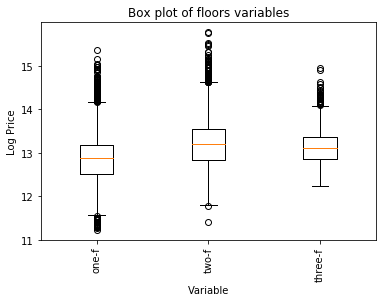

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([onef['price'], twof['price'], threef['price']])
plt.ylabel('Log Price')
ax.set_xticklabels(['one-f', 'two-f','three-f'], rotation = 'vertical')
plt.xlabel('Variable')
plt.title('Box plot of floors variables');

The plot shows variation between the distributions of the four variables. There are outliners in each condition Nest, we need to compute F-statistic and a p-value using `f_oneway` function

In [40]:
f_statistic, p_value = ss.f_oneway(onef['price'], twof['price'], threef['price'])
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 1252.4759238614874
P-value = 0.0


The F statistic is fairly large and the p-value is zero. We can reject the null hypothesis that the 4 variables have the same mean, as the probability of the differences arising from random chance is quite low.

From the above ANOVA results we know that there is some difference in the means of these variables. However, the ANOVA does not tell us which variable is significantly different. So we need to perform HSD test.

In [41]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df2 = pd.DataFrame({'vals' :onef['price'].tolist() + 
                    twof['price'].tolist() +
                   threef['price'].tolist() ,
                   'group_num': ['onef'] * len(onef) + ['twof'] * len(twof) + 
                    ['threef'] * len(threef) })
Tukey_HSD = pairwise_tukeyhsd(df2.vals, df2.group_num)
print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
  onef threef   0.2917  0.001 0.2435 0.3398   True
  onef   twof   0.3598  0.001 0.3428 0.3768   True
threef   twof   0.0681 0.0029 0.0196 0.1167   True
--------------------------------------------------


From the table, we can see whether there is significant difference based on p-values and the reject column. All of them have difference between pairs (label as 'True'). So floors plays a role in house pricing.

#### Summary for statistical analysis 
1. log price and log living area are better represented as normal distribution, while lot area is better represented as normal distribution.
2. Different categories in waterfront, bedrooms, floors, and condition have difference in price, suggesting that they contribute to house pricing. 

#### Now, wer can prepare data for trainning.

Predicting house price would be a regression problem. 

In [42]:
#selected features
features  = ['log price', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
             'view', 'condition', 'grade', 'yr_built',
       'zipcode', 'log sqft_living15']
# final_df = df[features]

In [43]:
#create a new dataframe for first data engineering
df2 =pd.DataFrame()
df2 = df[features]

Most features are categorical data, except log sqft_living15. Let's take care of numerical data first.

In [44]:
df2['log sqft_living15'].isnull().sum()

0

There's no missing values. 

Then we can normalize this variable.

In [45]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
pd.options.mode.chained_assignment = None
#normalize numberical category
scaler = MinMaxScaler()
log_l = pd.DataFrame(df2['log sqft_living15'])
normal_living  = scaler.fit_transform(log_l)
df2.loc[:,'log sqft_living15']  = normal_living

#### Next, we need to encode the cateogrical variables.

Based on our previous graphic analysis, we can group yr_built and zipcode first. 
For yr_built, we can use 1960 as a threshold, before 1960, we categorize as 'old', after 1960, we categorize as 'new'.

In [46]:
old = df2['yr_built'] <= 1960
new = df2['yr_built'] > 1960
df2.loc[old,'yr_built'] ='old'
df2.loc[new,'yr_built'] ='new'

For zipcode, 98100 would be a good seperator. Before 98100, we would categorize 'dt', after 98100, we categorize as 'suburban'. 

In [47]:
dt = df2['zipcode'] <= 98100
suburban = df2['zipcode'] >98100
df2.loc[dt, 'zipcode'] = 'dt'
df2.loc[suburban, 'zipcode'] = 'suburban'

In [48]:
#create a list of categorical variables that needs encode
cat_list = ['bedrooms', 'bathrooms', 'floors', 'waterfront',
             'view', 'condition','grade', 'yr_built','zipcode']
df2 = pd.get_dummies(df2, columns= cat_list)

#### Data are cleaned, and are ready to train regression model.
Three models are selected:

I choose two simple linear regression models, one tree-based model, and one non-linear model.

1. linear regression/lasso
2. Gradient Boosting Regressor
3. SVR (default 'rbf' kernel)
 

First, use linear regression. 

Split the dataset into training and testing data set.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#split data set
X = df2[df2.columns.values[1:]]
y = df2['log price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
#fitting linear regression model and get predicted values
lreg = LinearRegression().fit(X_train, y_train)
lreg_pre = lreg.predict(X_test)

In [51]:
#evaluate regression model using mean_squared_error
from sklearn.metrics import mean_squared_error
print('Mean squared error: %.3f '%mean_squared_error(y_test, lreg_pre))

Mean squared error: 21982438612577480.000 


In [52]:
#evaluate regression model using R2
from sklearn.metrics import r2_score
print('Linear Regression R2: %.3f '%r2_score(y_test, lreg_pre))

Linear Regression R2: -79746315703558688.000 


Linear model fails, it has huge mean sqaured and r2 score. 

Regularization is required. Since we have many features right now, lasso regression looks like a great chance. 

In [53]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha =0.1).fit(X_train, y_train)
la_pre = lasso.predict(X_test)
print('Mean squared error: %.3f '%mean_squared_error(y_test, la_pre))
print('Lasso Regression R2: %.3f '%r2_score(y_test, la_pre))

Mean squared error: 0.276 
Lasso Regression R2: -0.000 


Lasso regression improves a little bit, but still, r2 score is zero. Linear model might not be a good model for these dataset.

Next, try gradient boosting and SVR regression model.

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
gbr_pre = gbr.predict(X_test)

print('Mean squared error: %.3f '%mean_squared_error(y_test, gbr_pre))
print('Gradien Boosting R2: %.3f '%r2_score(y_test, gbr_pre))

Mean squared error: 0.097 
Gradien Boosting R2: 0.647 


In [55]:
from sklearn.svm import SVR
svr =SVR().fit(X_train, y_train)
svr_pre = svr.predict(X_test)
print('Mean squared error: %.3f '%mean_squared_error(y_test, svr_pre))
print('SVR R2: %.3f '%r2_score(y_test, svr_pre))

Mean squared error: 0.094 
SVR R2: 0.659 


From above two models, R2 is quite similar. In this case, change model might not be a good idea to improve accuracy a lot. Feature engineering is required. 

In [56]:
df2.columns.values

array(['log price', 'log sqft_living15', 'bedrooms_0', 'bedrooms_1',
       'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9',
       'bedrooms_10', 'bedrooms_11', 'bedrooms_33', 'bathrooms_0.0',
       'bathrooms_0.5', 'bathrooms_0.75', 'bathrooms_1.0',
       'bathrooms_1.25', 'bathrooms_1.5', 'bathrooms_1.75',
       'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5',
       'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_3.25',
       'bathrooms_3.5', 'bathrooms_3.75', 'bathrooms_4.0',
       'bathrooms_4.25', 'bathrooms_4.5', 'bathrooms_4.75',
       'bathrooms_5.0', 'bathrooms_5.25', 'bathrooms_5.5',
       'bathrooms_5.75', 'bathrooms_6.0', 'bathrooms_6.25',
       'bathrooms_6.5', 'bathrooms_6.75', 'bathrooms_7.5',
       'bathrooms_7.75', 'bathrooms_8.0', 'floors_1.0', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'waterfront_0', 'waterfront_1', 'view_0', 'view_1', 'view_2',

Noticed  that some features are related, such as larger livign areas also implies more bedrooms and bathrooms. Let's remove bathroooms and bedrooms to see how it changes model.

In [57]:
#take out the bedrooms bathrooms floors features, which are quite related.
df3 = df2[['log price', 'log sqft_living15','waterfront_0', 'waterfront_1', 'view_0', 'view_1', 'view_2',
       'view_3', 'view_4', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_1', 'grade_3', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'yr_built_new', 'yr_built_old',
       'zipcode_dt', 'zipcode_suburban']]


In [58]:
#split the dataset
X = df3[df3.columns.values[1:]]
y = df3['log price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [59]:
#train with Lasso model
lasso = linear_model.Lasso(alpha =0.1).fit(X_train, y_train)
la_pre = lasso.predict(X_test)
print('Mean squared error: %.3f '%mean_squared_error(y_test, la_pre))
print('Lasso Regression R2: %.3f '%r2_score(y_test, la_pre))

Mean squared error: 0.276 
Lasso Regression R2: -0.000 


In [60]:
#train with gradient boosting model
gbr = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
gbr_pre = gbr.predict(X_test)

print('Mean squared error: %.3f '%mean_squared_error(y_test, gbr_pre))
print('Gradien Boosting R2: %.3f '%r2_score(y_test, gbr_pre))

Mean squared error: 0.102 
Gradien Boosting R2: 0.631 


In [61]:
#train with SVR model
svr =SVR().fit(X_train, y_train)
svr_pre = svr.predict(X_test)
print('Mean squared error: %.3f '%mean_squared_error(y_test, svr_pre))
print('SVR R2: %.3f '%r2_score(y_test, svr_pre))

Mean squared error: 0.101 
SVR R2: 0.635 


All models trained with fewer features have lower r2 score and higher MSE, suggesting that those features are necessary. 

If we can't remove those features, then we need to re-engineering those features.

When revisiting our variables, I noticed that probably I can group bedrooms and bathrooms to reduce feature dimensions.


In [62]:
#create a third data frame for feature engineering.
df3 =pd.DataFrame()
df3 = df[features]

In [63]:
df3

,log price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,zipcode,log sqft_living15
0,12.31,3,1.00,1.00,0,0,3,7,1955,98178,7.20
1,13.20,3,2.25,2.00,0,0,3,7,1951,98125,7.43
2,12.10,2,1.00,1.00,0,0,3,6,1933,98028,7.91
3,13.31,4,3.00,1.00,0,0,5,7,1965,98136,7.22
4,13.14,3,2.00,1.00,0,0,3,8,1987,98074,7.50
...,...,...,...,...,...,...,...,...,...,...,...
21608,12.79,3,2.50,3.00,0,0,3,8,2009,98103,7.33
21609,12.90,4,2.50,2.00,0,0,3,8,2014,98146,7.51
21610,12.90,2,0.75,2.00,0,0,3,7,2009,98144,6.93
21611,12.90,3,2.50,2.00,0,0,3,8,2004,98027,7.25


Most of the features are categorical data, such as bedrooms, bathrooms and floors, let's encode the categorical data.

In [64]:
df3['bedrooms'].median()

3.0

Use bedroom median as a threshold to group bedroom variable.

In [65]:
#grouping bedrooom into two groups
small = df3['bedrooms'] <= 3.0
large = df3['bedrooms'] > 3.0
df3.loc[small,'bedrooms'] ='small'
df3.loc[large,'bedrooms'] ='large'

In [66]:
df3['bathrooms'].median()

2.25

Use bathrooms median as a threshold to group bathrooms variable

In [67]:
#grouping bathrooms into two groups
small = df3['bathrooms'] <= 2.25
large = df3['bathrooms'] > 2.25
df3.loc[small,'bathrooms'] ='small'
df3.loc[large,'bathrooms'] ='large'

In [68]:
df3['floors'].median()

1.5

Use floors median as a threshold to group bathrooms variable

In [69]:
#grouping floors into two groups
small = df3['floors'] <= 1.5
large = df3['floors'] > 1.5
df3.loc[small,'floors'] ='small'
df3.loc[large,'floors'] ='large'

Grades also has a wide range, we also group the grades

In [70]:
df3['grade'].median()

7.0

In [71]:
#grouping grade into two groups
small = df3['grade'] <= 1.5
large = df3['grade'] > 1.5
df3.loc[small,'grade'] ='small'
df3.loc[large,'grade'] ='large'

We also group yr_built and zipcode like what we did in the first trial

In [72]:
old = df3['yr_built'] <= 1960
new = df3['yr_built'] > 1960
df3.loc[old,'yr_built'] ='old'
df3.loc[new,'yr_built'] ='new'

In [73]:
dt = df3['zipcode'] <= 98100
suburban = df3['zipcode'] >98100
df3.loc[dt, 'zipcode'] = 'dt'
df3.loc[suburban, 'zipcode'] = 'suburban'

Encode all the categorical data.

In [74]:
#create a list of categorical variables that needs encode
cat_list = ['bedrooms', 'bathrooms', 'floors', 'waterfront',
             'view', 'condition','grade', 'yr_built','zipcode']
df3= pd.get_dummies(df3, columns= cat_list)

Data are ready to be trained

In [75]:
#split dataset
X = df3[df3.columns.values[1:]]
y = df3['log price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [76]:
#train with Lasso model
lasso = linear_model.Lasso(alpha =0.1).fit(X_train, y_train)
la_pre = lasso.predict(X_test)
print('Mean squared error: %.3f '%mean_squared_error(y_test, la_pre))
print('Lasso Regression R2: %.3f '%r2_score(y_test, la_pre))

Mean squared error: 0.266 
Lasso Regression R2: 0.035 


In [77]:
#train with gradient boosting model
gbr = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
gbr_pre = gbr.predict(X_test)

print('Mean squared error: %.3f '%mean_squared_error(y_test, gbr_pre))
print('Gradien Boosting R2: %.3f '%r2_score(y_test, gbr_pre))

Mean squared error: 0.131 
Gradien Boosting R2: 0.526 


In [78]:
#train with SVR model
svr =SVR().fit(X_train, y_train)
svr_pre = svr.predict(X_test)
print('Mean squared error: %.3f '%mean_squared_error(y_test, svr_pre))
print('SVR R2: %.3f '%r2_score(y_test, svr_pre))

Mean squared error: 0.132 
SVR R2: 0.521 


From two feature engineering, reducing features and grouping categorical data do not help improve model performance.
Let's try to train fall features, except date, id, which are not related to price. While long, lat, sqft_living, sqft_lot are repeated features to zipcode, sqft_living15 and sqft_lot15.

Let's encode all categorical variables.

In [79]:
df4 = pd.DataFrame()
df4 = df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_lot15',
       'log price', 'log sqft_living15']]

In [80]:
cat_list = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade',
            'yr_built', 'zipcode']
df4= pd.get_dummies(df4, columns= cat_list)

Next, we need to standardize all numerical variables.

In [81]:
num_list = ['sqft_above', 'sqft_basement', 'sqft_lot15', 'log price',
       'log sqft_living15']
for i in num_list:
    normal = scaler.fit_transform(pd.DataFrame(df4[i]))
    df4.loc[:,i]  = normal

Data are ready to train models.


In [82]:
features4 =df4.columns.values.tolist()
#remove log price from features
features4.pop(3)

'log price'

In [83]:
#split dataset
X = df4[features4]
y = df4['log price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [84]:
#fitting linear regression model and get predicted values
lreg = LinearRegression().fit(X_train, y_train)
lreg_pre = lreg.predict(X_test)
print('Mean squared error: %.3f '%mean_squared_error(y_test, lreg_pre))
print('Linear Regression R2: %.3f '%r2_score(y_test, la_pre))

Mean squared error: 5516239278976.393 
Linear Regression R2: -12463.504 


In [85]:
#train with Lasso model
lasso = linear_model.Lasso().fit(X_train, y_train)
la_pre = lasso.predict(X_test)
print('Mean squared error: %.3f '%mean_squared_error(y_test, la_pre))
print('Lasso Regression R2: %.3f '%r2_score(y_test, la_pre))

Mean squared error: 0.013 
Lasso Regression R2: -0.000 


In [86]:
#train with gradient boosting model
gbr = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
gbr_pre = gbr.predict(X_test)

print('Mean squared error: %.3f '%mean_squared_error(y_test, gbr_pre))
print('Gradien Boosting R2: %.3f '%r2_score(y_test, gbr_pre))

Mean squared error: 0.003 
Gradien Boosting R2: 0.781 


In [87]:
#train with SVR model
svr =SVR().fit(X_train, y_train)
svr_pre = svr.predict(X_test)
print('Mean squared error: %.3f '%mean_squared_error(y_test, svr_pre))
print('SVR R2: %.3f '%r2_score(y_test, svr_pre))

Mean squared error: 0.002 
SVR R2: 0.807 


With all features included, the performance of gradient boosting and SVR model based on R2 scores amd mean squared error. However, both linear and lasso regression still have poor performace, we might to tune parameters to improve performance. However, Gradient Boosting and SVR give promising perforamce in this dataset. 
### Summary

### Feature selection
When I first look at the data, I think some of the features are not related to price, like dates and ID. I also noticed that some features are very similar, like the sqft_living and sqft_living 15. Also, features like sqft_above and sqft_basement are somehow related to lot size. 

Thus, the first set of features I trained, I removed features, like sqft_basement, sqft_above, and groupping yr_build and zipcode into two ranges, trying to reduce the number of features. The best r2 I got is around 0.6. 

Secondly, I was thinking there are still too many features, and some features are related to each other. Like larger living areas also implies more bedrooms and bathrooms. So I removed bedrooms and bathrooms, only keeping the living areas. The performance became worse, suggesting that prices are dependent on both bedrooms and bathrooms.

Third, we know that bedrooms and bathrooms are necessary, but they have wide ranges of values. Then I used median of each features to group them, trying to make it more concise. Again, performance got worse. This make me think that the actual number of rooms matter in house pricing.

Lastly, I decided to include all features, except repeated features (long, lat, etc), and encode all categorial variables in their original form. And luckily, performance got improved to 0.8!

We see that most of the features play roles in house pricing, keepign them is necessary. To engierring features, first, removing features that are not related to the target variables, like id. Second, only keep features providing different information. Next, we need to find out which form of the data is better represented by normal distribution(or other distribution), then normalize all numerical values. Next, encoding the categorical variables. Finally, train the model. To improve model performance, we can grouping categorical data into smaller number of groups (although it doesn't work in this dataset). And this found out also agrees with our graphically analysis that bedroom, bathrooms affects prices siginificantly. Prices are not solely dependent on one factors. 

### Model selection
Linear regression is one of the most well know and well understood algorithm. The representation is an linear equation that have coefficients and features combine togother. Lasso regression is a selection model, where some features can be removed by having zero coefficient. Both regression model gave poor performance, implying that the price is heavily non-linearly dependent of features. And the aim of linear regression is to reduce the error. 

Next, I selected gradient boosting and SVR as new models. 

Gradient boosting a popular tree-based mechniasm that is use gradient descent in cost function to optimize model performance. SVR, a more complex linear regression model, which define how much error is acceptable in the model. It provides flexibility on errors, unlike linear model which only finds the smallest error. Use the same trainning and testing data set, SVR outperforms than gradient boosting. 


### Conclusion

In this king county house pricing dataset, we found that house pricing is not solely dependent on a few factors, like living areas, zipcode etc. Intead, the house pricing depends on most of the given features, living areas, number of bathrooms and bedrooms, waterfront or not, floors and so on. Also, house pricing is not linearly related to features due to the poor performance of linear regression models. Combined effect of various effect contribute to the house pricing in King county. The best model we found is the SVR model, with r2-score to be around 0.8, closd to the best value 1.0. 